In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-splines-splines)

For illustration, here is a spline interpolant using just a few nodes.

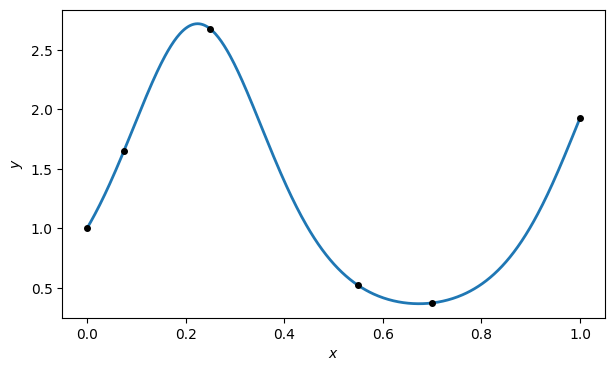

In [2]:
f = lambda x: exp(sin(7 * x))

x = linspace(0, 1, 500)
fig, ax = subplots()
ax.plot(x, f(x), label="function")

t = array([0, 0.075, 0.25, 0.55, 0.7, 1])  # nodes
y = f(t)  # values at nodes
ax.plot(t, y, "ko", label="nodes")

xlabel("$x$");  ylabel("$y$");

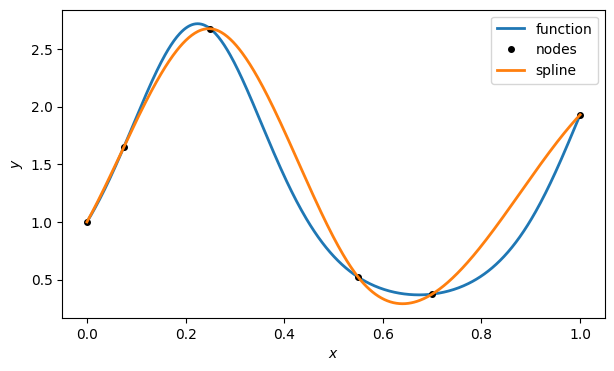

In [3]:
S = FNC.spinterp(t, y)
ax.plot(x, S(x), label="spline")
ax.legend()
fig

Now we look at the convergence rate as the number of nodes increases.

In [4]:
N = floor(2 ** linspace(3, 8, 17)).astype(int)
err = zeros(N.size)
for i, n in enumerate(N):
    t = linspace(0, 1, n + 1)  # interpolation nodes
    p = FNC.spinterp(t, f(t))
    err[i] = max(abs(f(x) - p(x)))
print(err)

[3.05633432e-02 2.39601586e-02 1.68054365e-02 7.64098319e-03
 2.89472870e-03 1.34574135e-03 5.43142890e-04 2.28104055e-04
 9.17629364e-05 3.71552636e-05 1.56015311e-05 6.34890672e-06
 2.53866817e-06 9.98323636e-07 4.35498457e-07 1.75251504e-07
 6.59321329e-08]


Since we expect convergence that is $O(h^4)=O(n^{-4})$, we use a log-log graph of error and expect a straight line of slope $-4$.

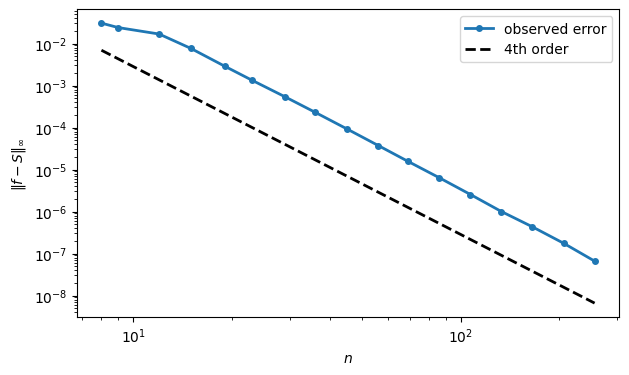

In [9]:
order4 = 0.1 * err[-1] * (N / N[-1]) ** (-4)
loglog(N, err, "-o", label="observed error")
loglog(N, order4, "k--", label="4th order")
xlabel("$n$")
ylabel("$\\|f-S\\|_\\infty$")
legend();